In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = (14, 7)
df =pd.read_csv("IMDB Dataset.csv")

In [7]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [9]:
df.shape

(50000, 2)

In [11]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [14]:
tfidf = TfidfVectorizer(
min_df = 5,
max_df = 0.95,
max_features = 8000,
stop_words = 'english'
)
tfidf.fit(df.review)
text = tfidf.transform(df.review)

Fitting 2 clusters
Fitting 4 clusters
Fitting 6 clusters
Fitting 8 clusters
Fitting 10 clusters
Fitting 12 clusters
Fitting 14 clusters
Fitting 16 clusters
Fitting 18 clusters
Fitting 20 clusters


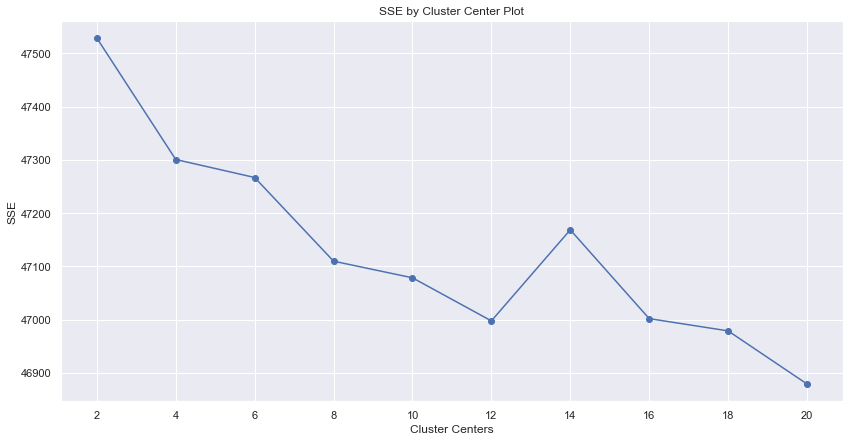

In [15]:
def generate_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024,
batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fitting {} clusters'.format(k))
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
generate_optimal_clusters(text, 20)

In [16]:
clusters = MiniBatchKMeans(n_clusters=4, init_size=1024,
batch_size=2048, random_state=20).fit_predict(text)

Text(0.5, 1.0, 'Generated TSNE Cluster Plot')

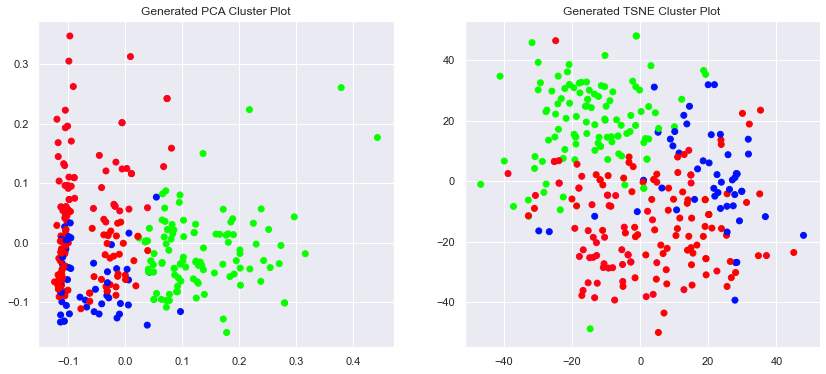

In [18]:
max_label = max(clusters)
max_items = np.random.choice(range(text.shape[0]), size=3000,
replace=True)
pca =PCA(n_components=2).fit_transform(text[max_items,:].todense())
tsne =TSNE().fit_transform(PCA(n_components=50).fit_transform(text[max_items,:].todense()))
idx = np.random.choice(range(pca.shape[0]), size=300, replace=True)
label_subset = clusters[max_items]
label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
f, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
ax[0].set_title('Generated PCA Cluster Plot')
ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
ax[1].set_title('Generated TSNE Cluster Plot')

In [19]:
from wordcloud import WordCloud
fig, ax = plt.subplots(4, sharex=True, figsize=(15,10*4))
plt.rcParams["axes.grid"] = False

ModuleNotFoundError: No module named 'wordcloud'